In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import copy
'''
Signal is the parent class and will hold information
like amplitude, frequency, offset.
It also allows the user to directly input xs and ys 
values through the set_xs(), set_ys()
'''
class Signal:
    def __init__(self, freq=440.0, amp=1.0, offset=0.0):
        self.freq = freq
        self.amp = amp
        self.offset = offset
        self.xs = np.asarray([])
        self.ys = np.asarray([])

    def set_xs(self, xs=[]):
        self.xs = xs
    def set_ys(self, ys=[]):
        self.ys = ys

    def _dt(self):
        return 1/(5*2*np.pi*self.freq)

    def __add__(self,other):
        if(self.xs[-1] >= other.xs[-1]):
            new_signal = copy.copy(other)
            new_signal.xs = self.xs
            new_signal.set_ys()
            new_signal.ys = self.ys + new_signal.ys
        else:
            new_signal = copy.copy(self)
            new_signal.xs = other.xs
            new_signal.set_ys()
            new_signal.ys = self.ys + new_signal.ys
        return new_signal

    def plot(self):
        plt.plot(self.xs,self.ys)

'''
CosSignal and SinSignal will be used to do the actual construction
of sine and cosine waves.
'''
class CosSignal(Signal):
    def __init__(self, freq=440.0, amp=1.0, offset=0.0):
        super().__init__(freq=freq, amp=amp,offset=offset)
        self.set_xs()
        self.set_ys()

    def set_xs(self):
        period = 1/self.freq
        self.xs = np.linspace(0,3*period, 101)

    def set_ys(self):
        self.ys = self.offset + self.amp*np.cos(2*np.pi*self.freq*self.xs)

    def get_freq(self):
        return self.freq
    def get_amp(self):
        return self.amp
    def get_offset(self):
        return self.offset

class SinSignal(Signal):
    def __init__(self, freq=440.0, amp=1.0, offset=0.0):
        super().__init__(freq=freq, amp=amp,offset=offset)
        self.set_xs()
        self.set_ys()

    def set_xs(self):
        period = 1/self.freq
        self.xs = np.linspace(0,3*period, 101)

    def set_ys(self):
        self.ys = self.offset + self.amp*np.sin(2*np.pi*self.freq*self.xs)

    def get_freq(self):
        return self.freq
    def get_amp(self):
        return self.amp
    def get_offset(self):
        return self.offset

cos_signal_1 = CosSignal(freq=440.0)
sin_signal_2 = SinSignal(freq=880.0, amp=0.5)
sum_wave = cos_signal_1 + sin_signal_2

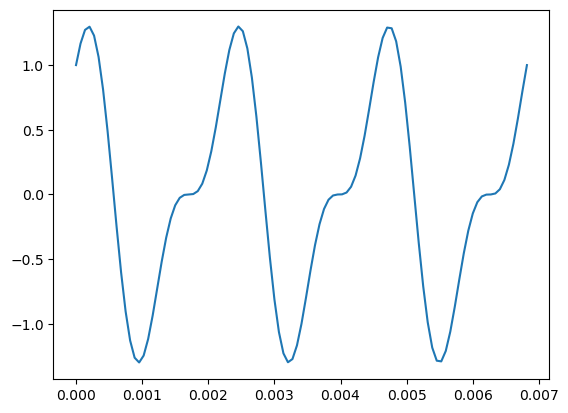

In [3]:
sum_wave.plot()

### Working with .wav files

In [4]:
import wave

In [5]:
violin_wave = wave.open("code_92002__jcveliz__violin-origional.wav")

**getframerate()** tells us how many samples of the sound are taken every second

In [6]:
sample_freq = violin_wave.getframerate()
print(sample_freq)

44100


**getnframes()** gives number of samples in the audio file

In [7]:
n_samples = violin_wave.getnframes()
print(n_samples)

220500


Length of sample

In [8]:
t_audio = violin_wave.getnframes()/violin_wave.getframerate()
print(t_audio)

5.0


Stereo will have 2 channels while mono will have one

In [9]:
n_channels = violin_wave.getnchannels()
print(n_channels)

1


In [10]:
signal_wave = violin_wave.readframes(violin_wave.getnframes())
type(signal_wave)

bytes

In [11]:
signal_array = np.frombuffer(signal_wave, dtype=np.int16)
signal_array.shape

(220500,)

If the channels is stereo signal_array will have to be split into left and right channels. **frombuffer()** creates a one dimensional array. To get the two channels we'll have to split this 1-D array into 2 one D-arrays down the middle. The first array will be the left channel and the second the right channel

In [12]:
times = np.linspace(0, t_audio, num=n_samples)

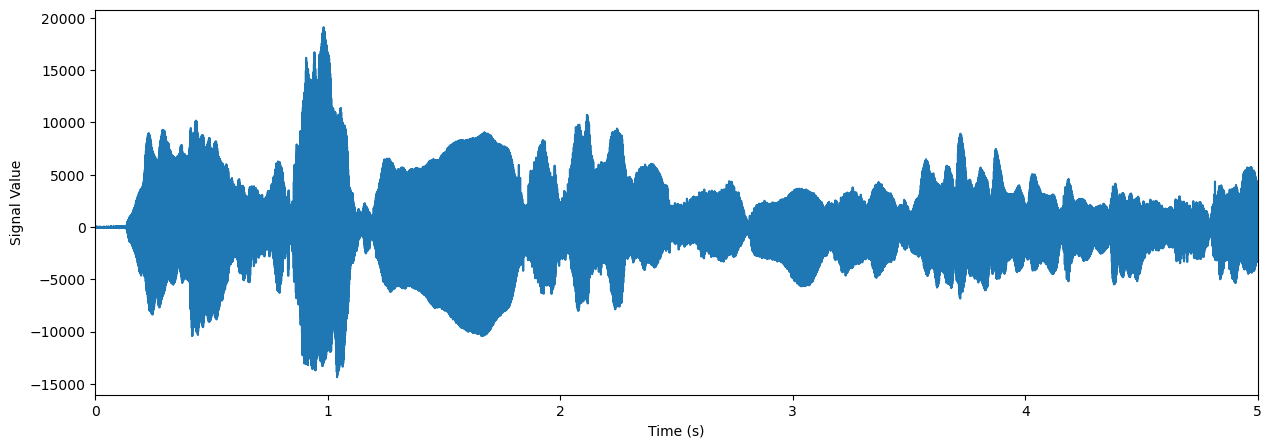

In [13]:
plt.figure(figsize=(15, 5))
plt.plot(times, signal_array)
plt.ylabel('Signal Value')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.show()

Show the first 1000 sample points

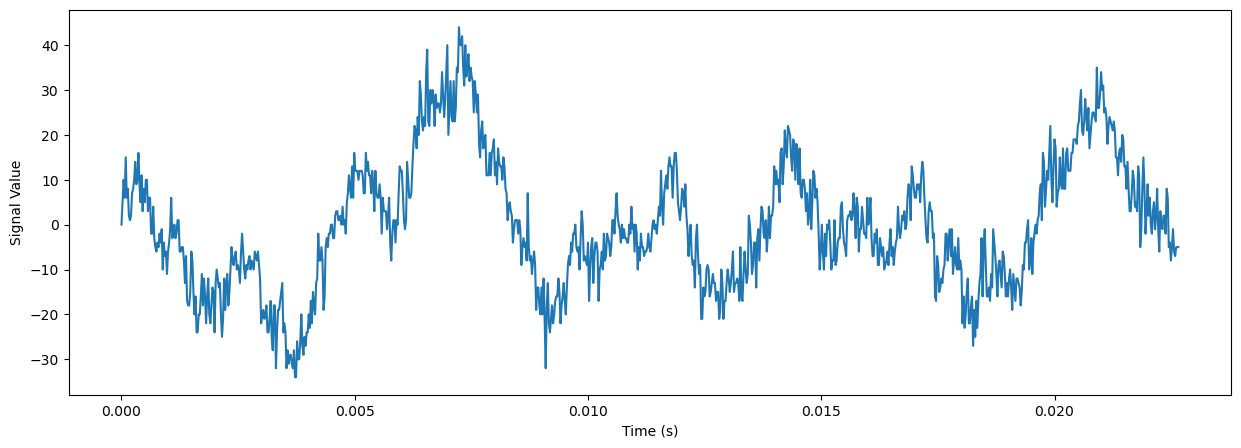

In [14]:
plt.figure(figsize=(15, 5))
plt.plot(times[0:1000], signal_array[0:1000])
plt.ylabel('Signal Value')
plt.xlabel('Time (s)')
plt.show()

pyplot's **specgram()** creates a Spectogram. A Spectogram uses FFT to show the frequencies and how much they occur in specific chunks of time. 

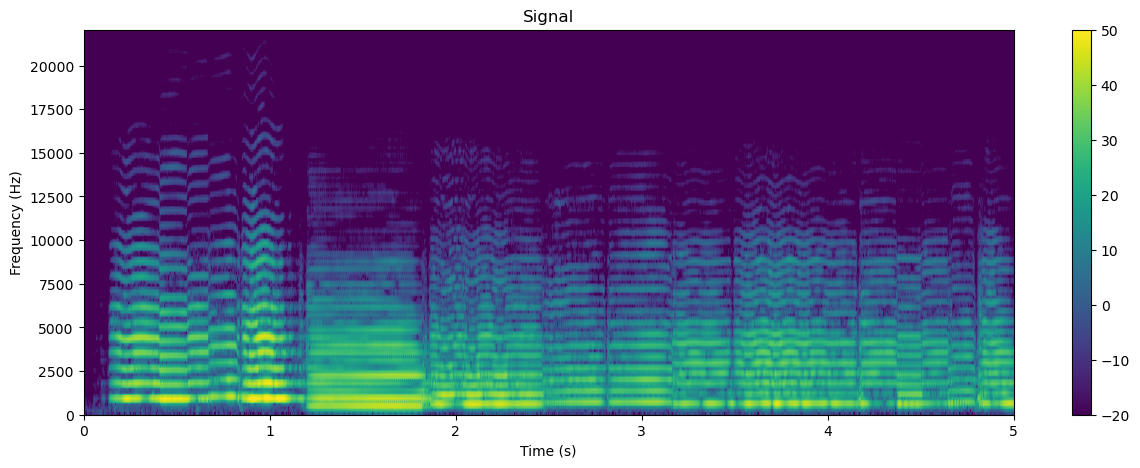

In [15]:
plt.figure(figsize=(15, 5))
plt.specgram(signal_array, Fs=sample_freq, vmin=-20, vmax=50)
plt.title('Signal')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.colorbar()
plt.show()

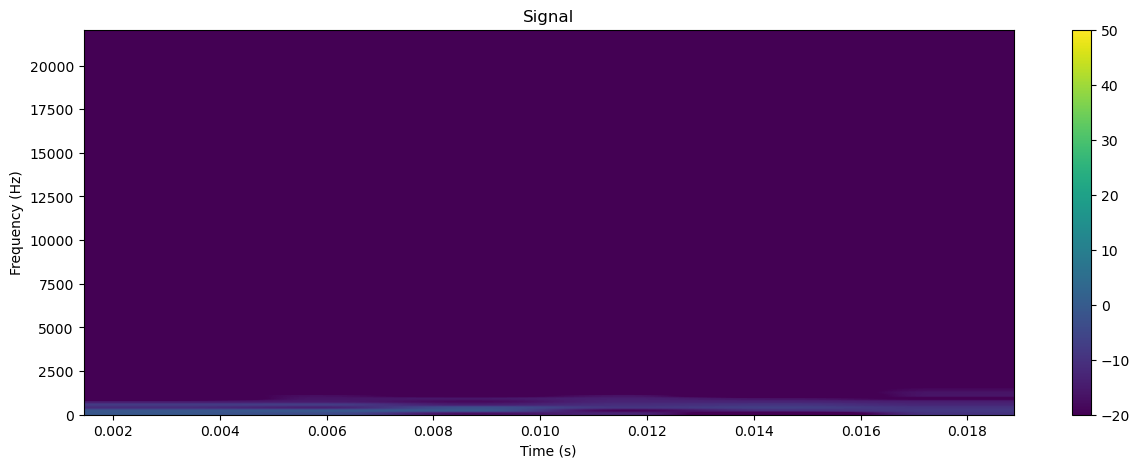

In [16]:
plt.figure(figsize=(15, 5))
plt.specgram(signal_array[0:1000], Fs=sample_freq, vmin=-20, vmax=50)
plt.title('Signal')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.colorbar()
plt.show()

In [17]:
signal_array[0:10], signal_array.shape

(array([ 0,  5, 10,  6, 15,  6,  8,  2,  1,  2], dtype=int16), (220500,))

In [18]:
violin_wave.close()

In [19]:
signal_array.max(), signal_array.min()

(19109, -14353)

The **getsampwdith()** tells how many bytes are used to sample the wave form. This value can normally only be 1 byte, 2 bytes or 3 bytes. It gives the resolution of the signal. A 1 byte sample width can represent 256 values (not to be confused with representing -128,127; 2 bytes represents 65536 values while 3 bytes represents 16777216. In reality 2 bytes is sufficient, while 1 byte would be poor quality audio and 3 bytes would be extremely high quality that would not be useful to the lay person.

See the following further details:
https://audioaudit.io/articles/podcast/sample-width

In [20]:
violin_wave.getsampwidth()

2

In [21]:
sample_freq, signal_array.shape

(44100, (220500,))

### The Fast Fourier Transform
\begin{equation}
x
\end{equation}

In [22]:
from scipy.fft import rfft, rfftfreq

In [23]:
'''
get_fft() returns the amplitude and frequency value for a sample of the wav sound file.
hs = np.fft.rfft(sample) - 

'''
def get_fft(signal_array, sample_freq, start_cutoff=0.0, sample_length=1.0):
    sample = signal_array
    ts = np.arange(len(signal_array)) / sample_freq
    end = ts[-1]
    start = ts[0]
    n = len(sample)
    i = round((n-1)*(start_cutoff - start) / (end - start))
    j = round((n-1)*(start_cutoff + sample_length - start) / (end - start))
    sample = sample[i:j]
    hs = rfft(sample)
    fs = rfftfreq(len(sample), 1/sample_freq)
    amps = np.absolute(hs)

    return fs, amps

In [24]:
fs, amps = get_fft(signal_array, sample_freq, start_cutoff=1.2, sample_length=0.6)

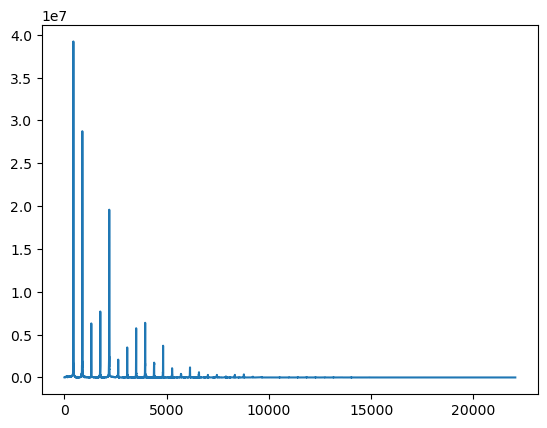

In [25]:
plt.plot(fs, amps)

In [26]:
amps.max(), amps.min()

(39219079.3392067, 20.530174550198286)

**Fourier Transform naive implementation**
\begin{equation}
F[X_n] = \sum_{n=0}^{N-1} x[n] e^{-2\pi j\frac{kn}{N}}
\end{equation}

In [29]:
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
def naive_dft(x_array):
    x = x_array
    fft_sum = []
    N = len(x)
    for n in range(0,len(x)):
        temp_value = 0
        for i in range(0,len(x)):
            temp_value += x[i]*np.power(np.e,-2*np.pi*1*1.j*(i*n/N))
        fft_sum.append(temp_value)
    return fft_sum


[(4.5+0j),
 (2.0815594803123156-1.6510987627325227j),
 (-1.8315594803123167+1.6082204064440697j),
 (-1.831559480312315-1.6082204064440715j),
 (2.0815594803123165+1.651098762732524j)]

In [28]:
rfft(x)

array([ 4.5       +0.j        ,  2.08155948-1.65109876j,
       -1.83155948+1.60822041j])

In [30]:
naive_dft(np.array([1.0, 2.0, 1.0, -1.0, 1.5]))

[(4.5+0j),
 (2.0815594803123156-1.6510987627325227j),
 (-1.8315594803123167+1.6082204064440697j),
 (-1.831559480312315-1.6082204064440715j),
 (2.0815594803123165+1.651098762732524j)]